<a href="https://colab.research.google.com/github/Raian-Rahman/DIP-2021-Tasks/blob/main/DIP_Lab_3_170041014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction 
In this lab, we will demonstrate the use of different filters. We have 3 different tasks for this lab. The tasks are:

#### Task 1 (Linear Filter)
Implement the Smoothing Operation with Average Filter (Box & Weighted Average filters)
Change the user defined parameters to obtain different levels of blurring effects.

#### Task 2 (Non-Linear Filter)
Implement the Noise (Salt&Pepper) Reduction technique using Median Filter ( or Max/Min)
Vary the noise amount and observe the outputs after applying median filter.
Change filter size too.

#### Task 3 (Image Sharpening)
Compute edge responses using Laplacian filter.
Display Laplacian image after scaling. 
Produce the sharp output using Laplacian responses.
Vary user defined parameter c to obtain different levels of sharpness.
g = f + c x (f*w)

# Loading the libraries

In [ ]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=cad99487021870d0b3ae4bd594d23cc2397b59c700865e976ee6b820fc7a12a0
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
#for iterating through the files and clearing output from the notebook  
import os
from IPython.display import clear_output


#Requred library for editing the files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the images

In [ ]:

!wget -r 'http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH03_Original_Images.zip'
!wget -r 'http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH04_Original_Images.zip'


--2021-06-09 13:57:57--  http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH03_Original_Images.zip
Resolving www.imageprocessingplace.com (www.imageprocessingplace.com)... 74.208.236.87
Connecting to www.imageprocessingplace.com (www.imageprocessingplace.com)|74.208.236.87|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019924 (3.8M) [application/zip]
Saving to: ‘www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH03_Original_Images.zip’

www.imageprocessing 100%[===================>]   3.83M  5.27MB/s    in 0.7s    

2021-06-09 13:57:58 (5.27 MB/s) - ‘www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH03_Original_Images.zip’ saved [4019924/4019924]

FINISHED --2021-06-09 13:57:58--
Total wall clock time: 0.9s
Downloaded: 1 files, 3.8M in 0.7s (5.27 MB/s)
--2021-06-09 13:57:58--  http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_im

In [ ]:
!unzip  '/content/www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH03_Original_Images.zip' 
!unzip  '/content/www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH04_Original_Images.zip' 
clear_output()

# Implementation of all utility functions needed for the task

## Convolution fucntion
In DIP, convolution is quite similar to correlation in DSP. Here, we need to run correlation without flipping the filter. So the following block of code will run the convolution fucntion. Parameter details are given below: 

In [ ]:
def zero_pad_image(image, image_height, image_width, pad):
    """
    This function adds zero padding to an image. Here we are assuming the image has a uniform padding size. 
    """
    # print(image_height)
    # print(image_width)
    pad = pad//2
    padded_height = image_height+2*pad
    padded_width = image_width+2*pad
    # print(padded_height, padded_width)
    padded_image = np.zeros((padded_height, padded_width ))

    padded_image[pad:image_height+pad  , pad:image_width+pad] = image
    # for row in padded_image:
    #     for column in row:
    #         for channel in column:
    #             if(channel > 255 or channel <0):
    #                 print("ekhane: ",channel)
    # print("eta")
    # print(image.shape)
    # print(padded_image.shape)
    return padded_image



def conv2d(image, filter, padding = 'same', stride = 1, scaling = False):
    """
    This function implements the convolution operation. It takes 3 parameters:
    image: the source image on which we will run convolution
    filter: the filter what will be convoluted. 
    padding: the amount of size by which we need to pad. if the padding is same, then we need to calculate the size of padding
             otherwise we will zero pad the image by the amount specified
    stride: the amount of shifts after an operation

    returns: the modified image
    """
    # filter = np.flipud(np.fliplr(filter))
    image = np.array(image)
    # print(image.shape)

    filter_height = filter.shape[0]
    filter_width = filter.shape[1]

    image_height = image.shape[0]
    image_width =  image.shape[1]

    if padding == 'same':
        pad = ((stride-1)*image_width-stride+filter_width)/2
    else:
        pad = padding

    padded_image = zero_pad_image(image, image_height, image_width, int(pad))

    output_image = np.zeros(padded_image.shape)
    # print(padded_image.shape)
    # padded_image = Image.fromarray(padded_image.astype('uint8'))
    
    # display(padded_image)

    for y in range(image_width):
        if y > image_width - filter_width:
            # it means the convolution has ended
            break
        
        if y % stride == 0:
            for x in range(image_height):
                if x > image_height - filter_height:
                    break

                try:
                    if x%stride==0:
                        output_image[x,y] = (filter * padded_image[x:x+filter_height, y:y+filter_width]).sum()
                except:
                    break
    if scaling==True:
        minimum_value = np.min(output_image)
        print(minimum_value)
        output_image = output_image + (-1*minimum_value)
        maximum_value = np.max(output_image)
        output_image = (output_image/maximum_value)*255.0
    output = Image.fromarray(output_image.astype('uint8'))
    return output



# Task 01 (Box and Weighted average filters)
As we can see, we have implemented convolution function that takes the filter and the image. For box image and weighted average, the filters are different. \\
The following block of code contains two function that generates the filter. 

### Box Filter
For box filter, the filter is quite simple. We simply need a square shape filter of size $n$.\\

It creates a $n\times n$ filter where all the vaules are equal to $\frac{1}{n\times n}$

In [ ]:
def generate_box_filter(filter_size):
    singe_element = [1.0/(filter_size*filter_size)]
    filter = [singe_element*filter_size]*filter_size
    return np.array(filter, dtype=float)

In [ ]:
print(generate_box_filter(5))

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


### Weighted Average Filter
The weighted average filter is little bit different compared to box filter. In the case of weighted average filter, we need to have different weights for different positions of the filter. The formula for weight at a certain pixel position is:
$$C\times e^{-\frac{D^2}{2 \sigma^2}}$$
where, \\
$C$ -> the constant value at the center, \\
$D$ -> the distance of the pixel from center, \\
$\sigma$ -> a hyperparameter for varaince

Now,  $$D = \sqrt{x^2 + y^2}$$
where x and y is the vertical and horizontal distance. 

In [ ]:
import math 

def find_distance(x,y,center):
    return (x-center)*(x-center) + (y-center)*(y-center)

def generate_weighted_average_filter(filter_size, constant_value=4, variance=1):
    filter = [[0]*filter_size]*filter_size
    center_position = filter_size//2
    sum = 0
    for i in range(filter_size):
        for j in range(filter_size):
            filter[int(i)][int(j)] = constant_value * math.exp(-1*find_distance(i,j,center_position)/(2*variance*variance))
            sum += filter[i][j]
    filter = np.array(filter)
    filter = filter/sum
    # print(filter)
    return filter


In [ ]:
generate_weighted_average_filter(5, 9, 1)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

### Discussion


#### Box Filter
If we apply box filter convolution on an image, then we will see the following:

Text(0.5, 1.0, 'Image with box filter size 5')

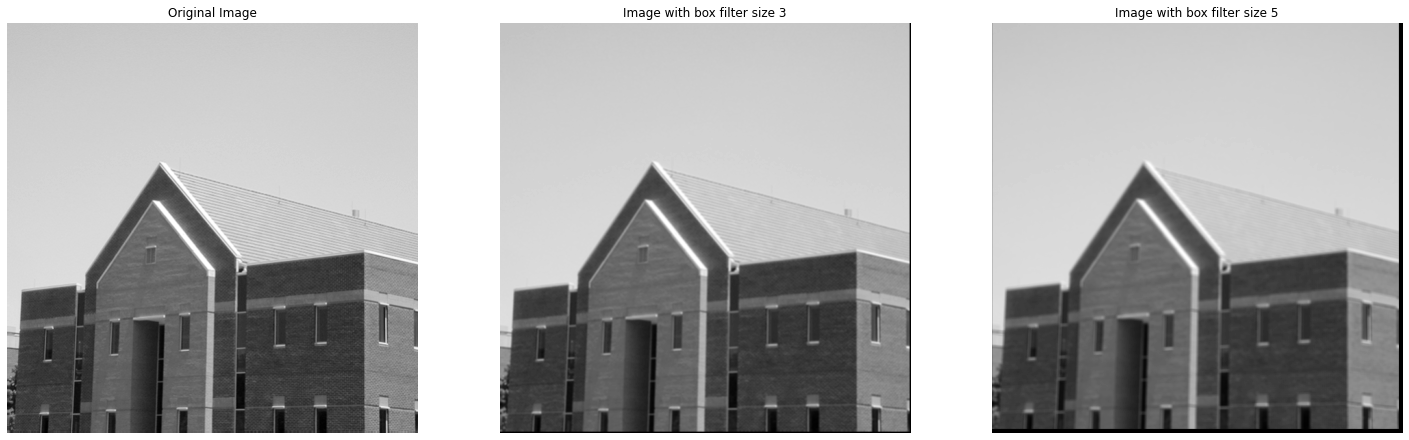

In [ ]:
image = Image.open('/content/DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,3,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(conv2d(image, generate_box_filter(3), padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with box filter size {3}')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(conv2d(image, generate_box_filter(5), padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with box filter size {5}')


The above image shows output image after using a box filter of size $3$ and $5$ respectively. The leftmost image is the original one. If we compare the leftmost image with the middle one, then we can see that the middle one is little bit blury but, the image is still quite sharp. The rightmost image used a box filter of size $5$, so it is more blured compared to the other two images. From here we can see that the higher the box size, the image will seem more **smooth or blury** after using box filter. 

#### Weighted Average Filter
If we apply box filter convolution on an image, then we will see the following:

Text(0.5, 1.0, 'Image with weighted filter size 7 with constant value 9')

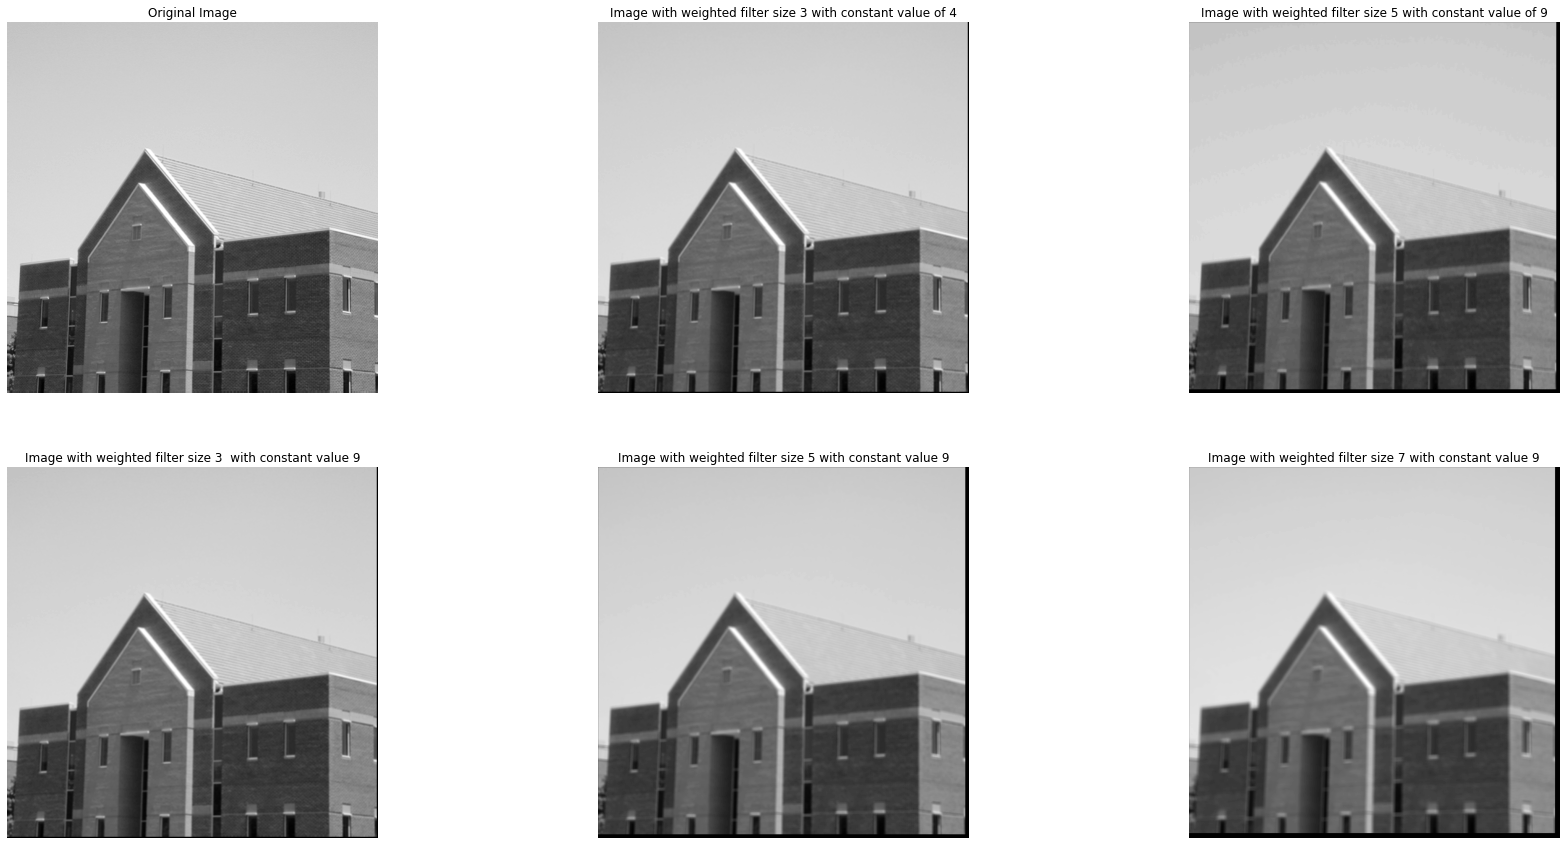

In [ ]:
image = Image.open('/content/DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif')

fig = plt.figure(figsize = (30,15))
index = 1

fig.add_subplot(2,3,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(2,3,index)
plt.imshow(conv2d(image, generate_weighted_average_filter(3,4,1), padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with weighted filter size {3} with constant value of {4}')

index += 1
fig.add_subplot(2,3,index)
plt.imshow(conv2d(image, generate_weighted_average_filter(5,9,1), padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with weighted filter size {5} with constant value of {9}')

index += 1

fig.add_subplot(2,3,index)
plt.imshow(conv2d(image, generate_weighted_average_filter(3,9,3), padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with weighted filter size {3}  with constant value {9}')

index += 1
fig.add_subplot(2,3,index)
plt.imshow(conv2d(image, generate_weighted_average_filter(5,9,3), padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with weighted filter size {5} with constant value {9}')

index += 1
fig.add_subplot(2,3,index)
plt.imshow(conv2d(image, generate_weighted_average_filter(7,9,5), padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with weighted filter size {7} with constant value {9}')

In the above figure, the topleft image is the original image. Compared to original image, the other images look less sharpening. Here, we can see that in the case of weighted average filter, we have three hyperparameters:

- The filter size
- The value of weight at the center pixel
- The variance constant

We use those hyperparameter to define how much importance should be given to which node. We can see, on the figure, we have two images whre we applied a box filter of size $3$. Both of them looks a little blury compared to the original one. But, the one with lower constant value shows a better sharp image. 

The variance constant is used to define the distribution of the weights along different pixels in the filter. In the top right image and bottom middle image, we can see that we have used the same filter with a different variance. Both the images look almost similar.

Then on the bottom right image, we showed an iamge where we used a filter of size $7$. It looks more blury compared to all other images.

## Task 02 (Non Linear Filter)
In this section, we need to implement a new convolution operation which is nonlinear. In this section, we will implement a new convolution operation that will use *median, min or max* as the filter. \\
- The median filter is mostly used for noise reduction. It reduces **salt and pepper noise** from an image given the image doesn't have a lot of noise
- The min filter will only reduce the salt noise 
- The max filter will only reduce the pepper noise

These filters are implemented below:

### Nonlinear filter

In [ ]:
def find_median(array,length):
    li = []
    for row in array:
        for item in row:
            li.append(item)

    li.sort()
    return li[length//2]


def non_linear_filter(image, neighbour_region, conv_type='median', padding = 'same', stride = 1):
    """
    This filter implements the non_linear_filtering operation along with the convolution. The parameters of the operation are:
    image: the input image
    neighbour_region: an integer representing the region where that we will be considered for operation
    type: it is a string that defines the type of operaration
    padding: here we set the value of padding. If the padding is same then we calculate the padding size
    stride: the amount of strides
    """
    image = np.array(image)
    print(image.shape)


    image_height = image.shape[0]
    image_width =  image.shape[1]

    if padding == 'same':
        pad = ((stride-1)*image_width-stride+neighbour_region)/2
    else:
        pad = padding

    padded_image = zero_pad_image(image, image_height, image_width, int(pad))

    output_image = np.zeros(padded_image.shape)
    # print(padded_image.shape)
    # padded_image = Image.fromarray(padded_image.astype('uint8'))
    
    # display(padded_image)

    for y in range(image_width):
        if y > image_width - neighbour_region:
            # it means the convolution has ended
            break
        
        if y % stride == 0:
            for x in range(image_height):
                if x > image_height - neighbour_region:
                    break

                try:
                    if x%stride==0:
                        # print("ekhane")
                        # print(result)
                        if conv_type == 'median':
                            output_image[x,y] = find_median(padded_image[x:x+neighbour_region, y:y+neighbour_region],neighbour_region*neighbour_region)
                        elif conv_type == 'min':
                            output_image[x,y] = (padded_image[x:x+neighbour_region, y:y+neighbour_region]).min()
                        elif conv_type == 'max':
                            output_image[x,y] = (padded_image[x:x+neighbour_region, y:y+neighbour_region]).max()
                        else:
                            print("TYPE NOT DEFINED")
                            return 
                except:
                    break
    
    output = Image.fromarray(output_image.astype('uint8'))
    return output

#### Add noise to image
In this section, we will add random salt and pepper noise to our image. The following function implements that. This function was implemented from a stack overflow discussion. Link to that solution is [here](https://stackoverflow.com/a/60535299/13108382)

In [ ]:
def salt_and_pepper(image, prob=0.05):
    # If the specified `prob` is negative or zero, we don't need to do anything.
    if prob <= 0:
        return image

    arr = np.asarray(image)
    original_dtype = arr.dtype

    intensity_levels = 2 ** (arr[0, 0].nbytes * 8)

    min_intensity = 0
    max_intensity = intensity_levels - 1


    random_image_arr = np.random.choice(
        [min_intensity, 1, np.nan], p=[prob / 2, 1 - prob, prob / 2], size=arr.shape
    )

    
    salt_and_peppered_arr = arr.astype(np.float) * random_image_arr


    salt_and_peppered_arr = np.nan_to_num(
        salt_and_peppered_arr, nan=max_intensity
    ).astype(original_dtype)

    return Image.fromarray(salt_and_peppered_arr)

## Discussion


### Median Filter

#### Median Filter with 8% noise

(600, 600)
(600, 600)
(600, 600)


Text(0.5, 1.0, 'Image with median filter size 9')

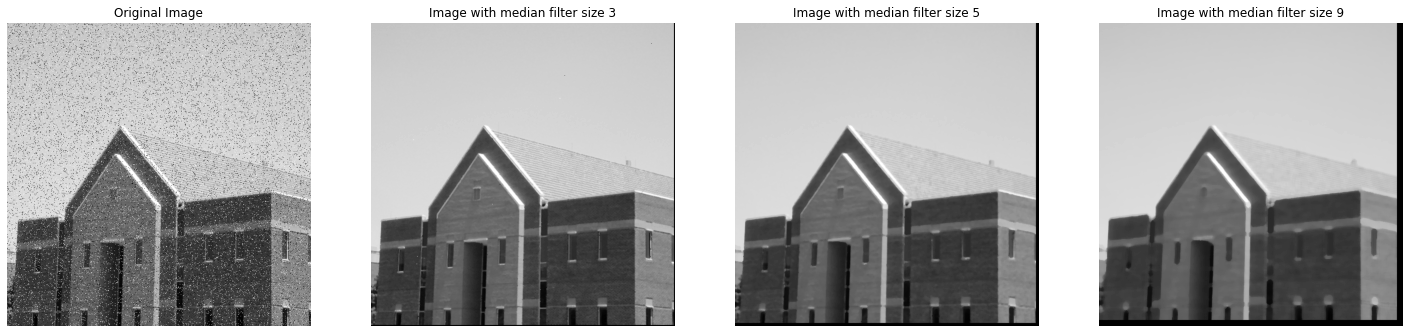

In [ ]:
image = Image.open('/content/DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,4,index)
plt.imshow(salt_and_pepper(image, 0.08), cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.08), 3, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {3}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.08), 5, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {5}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.08), 9, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {9}')



In the above images, we have added $8\%$ **SALT AND PEEPER NOISE** to the image. now, as we can see, we cant see much of a noise if we use a filter of size $3,5,7$. But, as we increase the filter size, the image looses most of its sharpness and looks more smooth.

#### Median Filter with $18\%$ noise

(600, 600)
(600, 600)
(600, 600)


Text(0.5, 1.0, 'Image with median filter size 9')

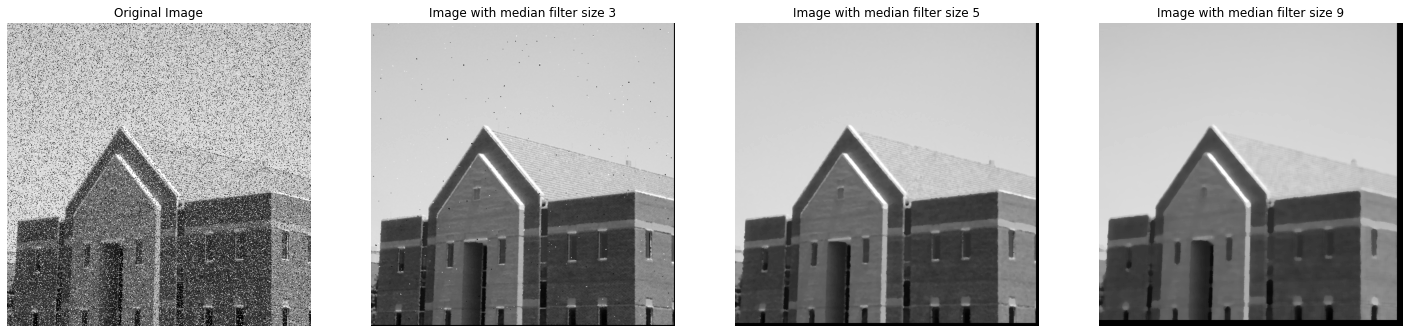

In [ ]:
image = Image.open('/content/DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,4,index)
plt.imshow(salt_and_pepper(image, 0.18), cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.18), 3, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {3}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.18), 5, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {5}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.18), 9, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {9}')



In the above image, we added $18\%$ noise to the image. As we can see with a filter of size $3$, there is still some noises. The main reason is in that small regions, there the black and white pixels were quite close to each other . But as we see, when we used a filter size of $5$, the image gets almost $0$ noise as the number of noises becomes outliers among $25$ pixel values. With filter of size 9, the image doen's have any noise as well as the image gets more blury

#### Median Filter with $60\%$ noise

(600, 600)
(600, 600)
(600, 600)


Text(0.5, 1.0, 'Image with median filter size 9')

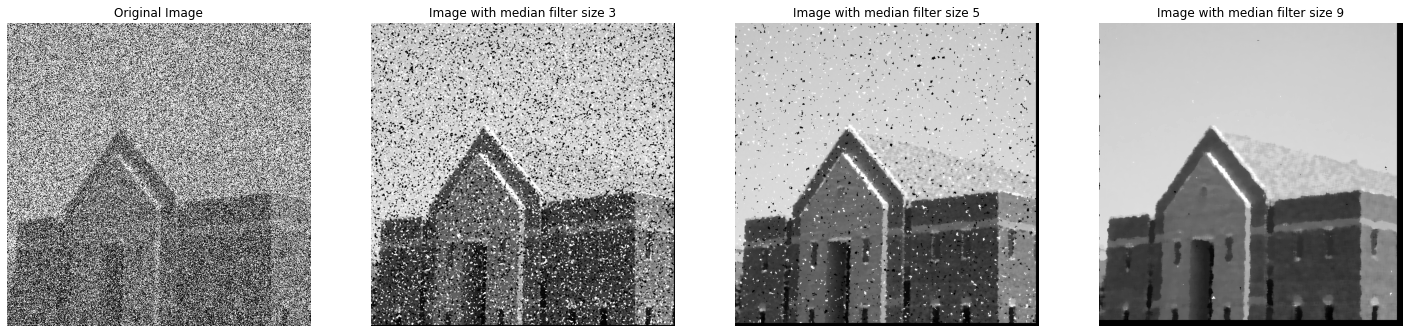

In [ ]:
image = Image.open('/content/DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,4,index)
plt.imshow(salt_and_pepper(image, 0.60), cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.60), 3, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {3}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.60), 5, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {5}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.60), 9, padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {9}')



In the above image, we added $60\%$ noise to the image. We can see neither filter of size $3$ or $5$ can reduce the noise. But as we increase the filter size, the image gets less number of noise but it becomes much more **distorted**. It is because, the noise displaces the median value at a certain pixel and thus makes the image more distorted. 

### Min/Max filter

#### Min Filter with $48\%$ noise

(600, 600)
(600, 600)
(600, 600)


Text(0.5, 1.0, 'Image with median filter size 9')

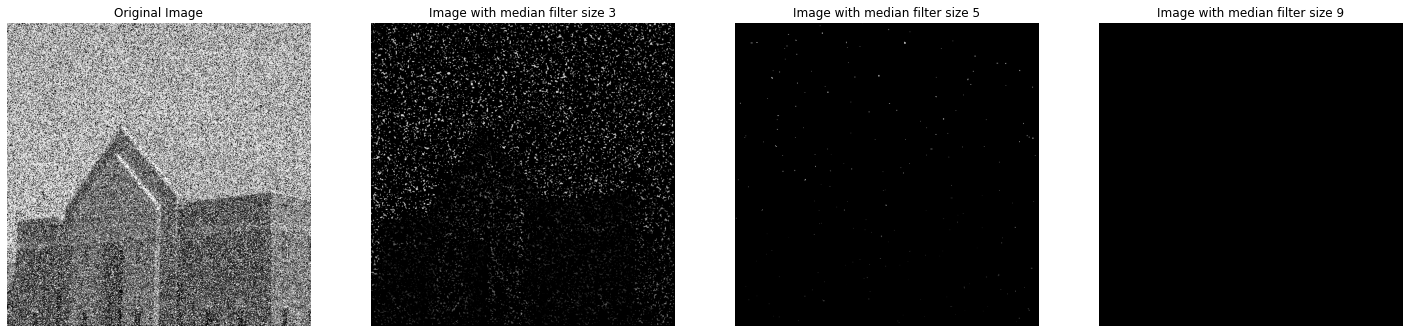

In [ ]:
image = Image.open('/content/DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,4,index)
plt.imshow(salt_and_pepper(image, 0.48), cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.48), 3, 'min',padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {3}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.48), 5, 'min', padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {5}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.48), 9,'min', padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {9}')



In the image, we can see we have around 60% noise on the original image. Then as we can see, there are almost peeper noise on every point of the image. So using the **min** filter makes other pixels of the image black. Thus reducing information from the image and making it quite unusable. 

#### Max Filter with $48\%$ noise

(600, 600)
(600, 600)
(600, 600)


Text(0.5, 1.0, 'Image with median filter size 9')

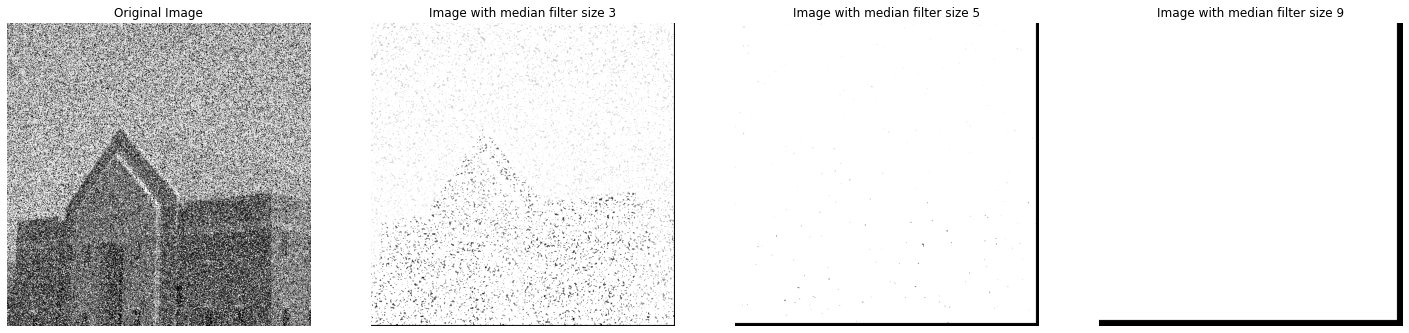

In [ ]:
image = Image.open('/content/DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif')

fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,4,index)
plt.imshow(salt_and_pepper(image, 0.48), cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.48), 3, 'max',padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {3}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.48), 5, 'max', padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {5}')

index += 1
fig.add_subplot(1,4,index)
plt.imshow(non_linear_filter(salt_and_pepper(image, 0.48), 9,'max', padding = 'same'), cmap ='gray')
plt.axis('off')
plt.title(f'Image with median filter size {9}')



In the image, we can see we have around 60% noise on the original image. Then as we can see, there are almost salt noise on every point of the image. So using the **max** filter makes other pixels of the image white. Thus reducing information from the image and making it quite unusable. 

# Task 03 (Image Sharpening)
We can do sharping operation with laplacian filter. After deriving the formula we will get a different laplacian filter. A structure of laplacian filter is given below:

$$\begin{pmatrix}
  d1 & v & d2  \\
  h & c & h  \\
  d2 & v & d1  \\
 \end{pmatrix}$$

Now, the $c$ value will be negative sign of sum value of all the other filters. So the possible laplacian filter values are:

$\begin{pmatrix}
  0 & 1 & 0  \\
  1 & -4 & 1  \\
  0 & 1 & 0  \\
 \end{pmatrix}   
 \begin{pmatrix}
  0 & -1 & 0  \\
  -1 & 4 & -1  \\
  0 & -1 & 0  \\
 \end{pmatrix}$

$\begin{pmatrix}
  1 & 1 & 1  \\
  1 & -8 & 1  \\
  1 & 1 & 1  \\
 \end{pmatrix}  
 \begin{pmatrix}
  -1 & -1 & -1  \\
  -1 & 8 & -1  \\
  -1 & -1 & -1 \\
 \end{pmatrix}$

### Laplacian Filter

So, we will define a function that will take the number of directions and create a $3 \times 3$ filter with that direction

In [ ]:
def generate_laplacian_filter(neighbour_sign = 1, sign_array = [1,1,1]):
    filter = [[0]*3]*3
    filter = np.array(filter)
    # print(np.array(filter))
    if sign_array[0]==1:
        #horizontal
        for i in range(0,3):
            # print("ho ")
            # print(np.array(filter))
            filter[1,:] = neighbour_sign
    # print(np.array(filter))
    if sign_array[1]==1:
        for i in range(0,3):
            # print(np.array(filter))
            filter[:,1] = neighbour_sign
    # print(np.array(filter))
    if sign_array[2]==1:
        for i in range(0,3):
            # print(np.array(filter))
            filter[i][i] = neighbour_sign
            filter[i][2-i] = neighbour_sign
            # print(np.array(filter))
            
    sum = 2*sign_array[0] + 2*sign_array[1] + 2*2*sign_array[2]
    filter[1][1] = -neighbour_sign*sum
    filter = np.array(filter)
    # filter = filter/np.sum(filter)
    # print(filter)
    return filter 

### Updated Convolution Function with scaling operation

In [ ]:
def conv2d_laplacian(img, filter, pad = True):
    """
    This function implements the convolution operation. It takes 3 parameters:
    image: the source image on which we will run convolution
    filter: the filter what will be convoluted. 
    padding: True if we need same padding
    returns: the modified image
    """
    intensity_matrix = np.array(img)

    img_dimX, img_dimY = intensity_matrix.shape
    flt_dimX, flt_dimY = filter.shape
    
    if pad:
        padding_dim = (img_dimX+flt_dimX-1, img_dimY+flt_dimY-1)
        img_originX, img_originY = (int(flt_dimX/2), int(flt_dimY/2))
    else:
        padding_dim = intensity_matrix.shape
        img_originX, img_originY = 0, 0
    
    padded = np.zeros(padding_dim)
    padded[img_originX:img_originX+img_dimX,img_originY:img_originY+img_dimY]=intensity_matrix

    output = np.zeros(intensity_matrix.shape)
    
    for x in range(0,img_dimX):
        for y in range(0,img_dimY):
            output[x,y]=np.sum(np.multiply(padded[x:x+flt_dimX,y:y+flt_dimY],filter))
    return output

### Laplacian Mask Generation

In [ ]:
def generate_laplacian_mask(image, filter_neighbour_sign, horizontal=True, vertical=True, diagonal=True):
    # display(image)
    direction = [0]*3
    if horizontal == True:
        direction[0]=1
    if vertical == True:
        direction[1]=1
    if diagonal == True:
        direction[2]=1
    filter = generate_laplacian_filter(filter_neighbour_sign, direction)
    # print(filter)
    masked_image = conv2d_laplacian(image, filter)
    
    if True:
        minimum_value = np.min(masked_image)
        # print(minimum_value)
        masked_image_scale = masked_image + (-1*minimum_value)
        maximum_value = np.max(masked_image_scale)
        masked_image_scale = (masked_image_scale/maximum_value)*255.0
    return masked_image, masked_image_scale 

### Sharpened image generation

In [ ]:
def final_laplacian_filter(image, filter_neighbour_sign, horizontal, vertical, diagonal, scaling_factor):
    mask, masked_scale = generate_laplacian_mask(image,filter_neighbour_sign, horizontal, vertical, diagonal)
    image = np.array(image)
    mask = np.array(mask)
    sharpened_image = image+scaling_factor*mask
    sharpened_image_scaled = sharpened_image
    if True:
        """
        Here we clipped the values of the pixel values that are less than 0 or greater than 255
        """
        sharpened_image_scaled[sharpened_image_scaled > 255] = 255
        sharpened_image_scaled[sharpened_image_scaled < 0] = 0
        

    # print(np.min(sharpened_image),np.max(sharpened_image))
    return Image.fromarray( sharpened_image_scaled.astype('uint8')), Image.fromarray( sharpened_image.astype('uint8')), Image.fromarray( masked_scale.astype('uint8'))

# Discussion

### Examples with description

(540, 466)
(540, 466)


Text(0.5, 1.0, 'Sharpened Image  with scaling value of 5.0')

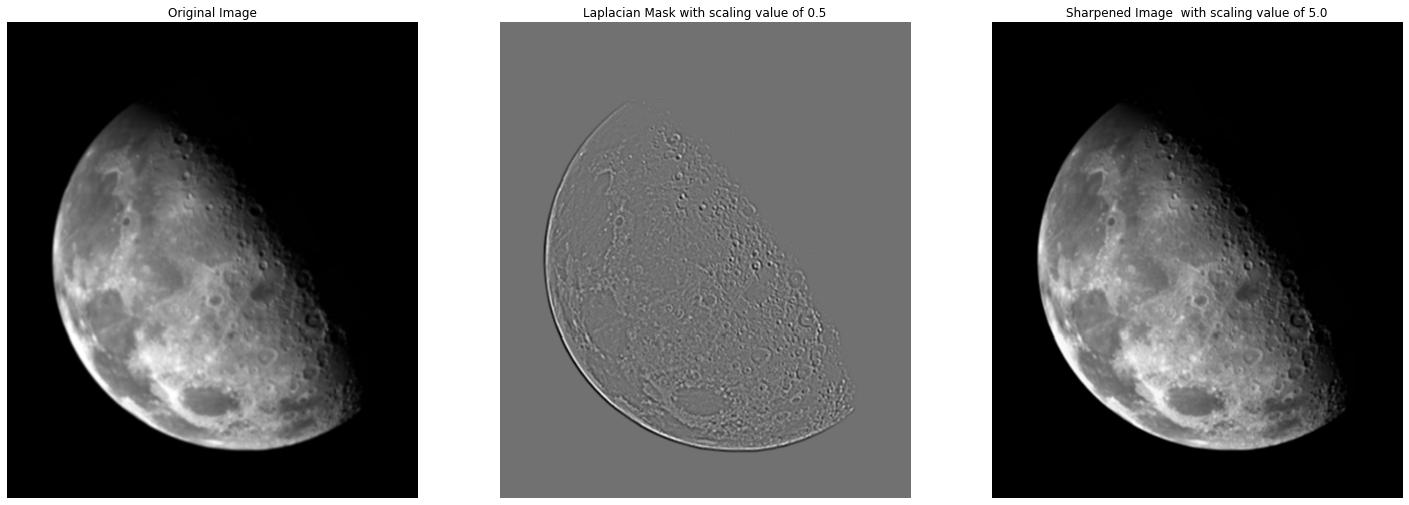

In [ ]:
fig = plt.figure(figsize = (25,50))
index = 1

image = Image.open('/content/DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif')
image = conv2d(image,generate_weighted_average_filter(3))
sharpened_scale,sharpened,masked_scale =final_laplacian_filter(image, -1, True, True, False,0.5)
img0 = sharpened_scale
print(np.array(image).shape)
print(np.array(sharpened_scale).shape)


fig.add_subplot(1,3,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(masked_scale, cmap ='gray')
plt.axis('off')
plt.title(f'Laplacian Mask with scaling value of {0.5}')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(sharpened, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image  with scaling value of {5.0}')


#### Explanation
In the figure, we used an image of moon which was blured. We used a 2 directional laplacian filter with scaling value of $0.5$. As we can see the image seems much more sharp compared to the original image. This is because as we can see, the laplacian filter increases the sharpness of an image.

(540, 466)
(540, 466)


Text(0.5, 1.0, 'Sharpened Image with scaling value of 1.0')

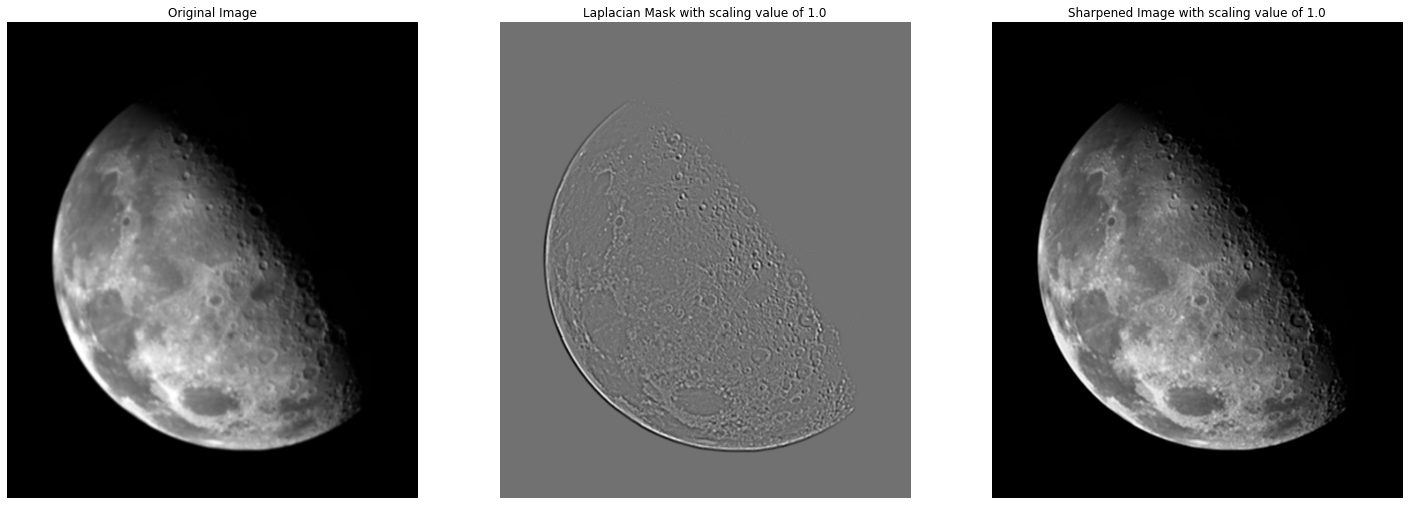

In [ ]:
fig = plt.figure(figsize = (25,50))
index = 1

image = Image.open('/content/DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif')
image = conv2d(image,generate_weighted_average_filter(3))
sharpened_scale,sharpened,masked_scale = final_laplacian_filter(image, -1, True, True, False,1.0)
img1 = sharpened_scale
print(np.array(image).shape)
print(np.array(sharpened_scale).shape)


fig.add_subplot(1,3,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(masked_scale, cmap ='gray')
plt.axis('off')
plt.title(f'Laplacian Mask with scaling value of {1.0}')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(sharpened, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image with scaling value of {1.0}')


#### Explanation
In the figure, we used an image of moon which was blured. We used a 2 directional laplacian filter with scaling value of $1$. As we can see the image seems much more sharp compared to the original image. This is because as we can see, the laplacian filter increases the sharpness of an image. Even the image seems much more sharp compared to the the earlier processed image. 

(540, 466)
(540, 466)


Text(0.5, 1.0, 'Sharpened Image with scaling value of 3.0')

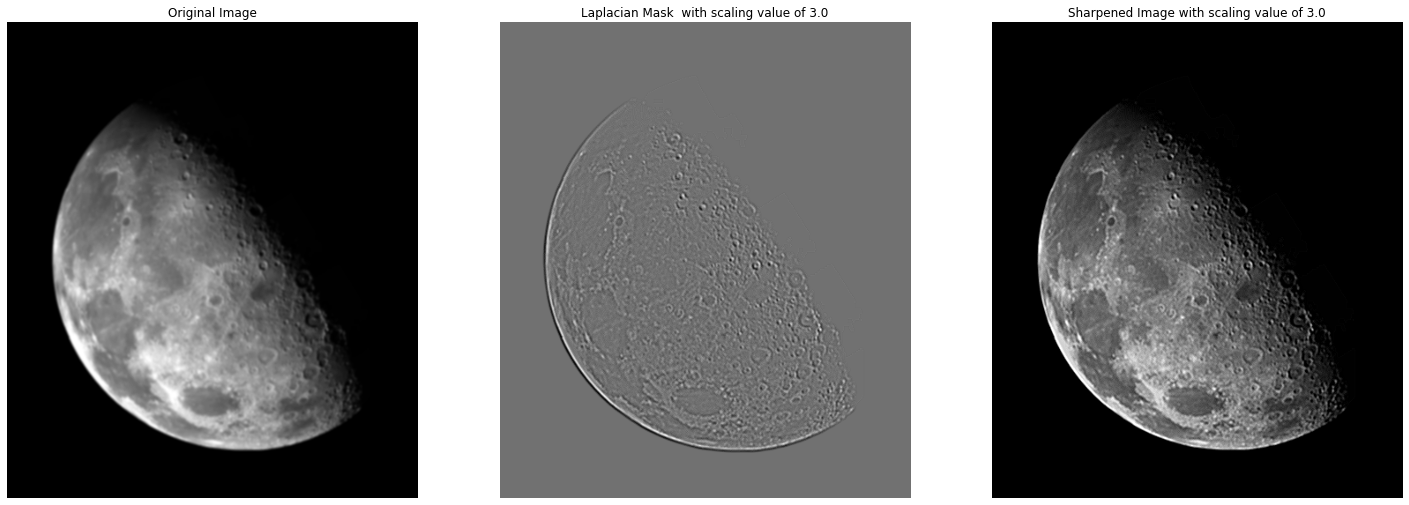

In [ ]:
fig = plt.figure(figsize = (25,50))
index = 1

image = Image.open('/content/DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif')
image = conv2d(image,generate_weighted_average_filter(3))
sharpened_scale,sharpened,masked_scale =final_laplacian_filter(image, -1, True, True, False,3.0)
img2 = sharpened_scale
print(np.array(image).shape)
print(np.array(sharpened_scale).shape)


fig.add_subplot(1,3,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(masked_scale, cmap ='gray')
plt.axis('off')
plt.title(f'Laplacian Mask  with scaling value of {3.0}')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(sharpened, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image with scaling value of {3.0}')


#### Explanation
In the figure, we used an image of moon which was blured. We used a 2 directional laplacian filter with scaling value of $3.0$. As we can see the image seems much more sharp compared to the original image. This is because as we can see, the laplacian filter increases the sharpness of an image.

(540, 466)
(540, 466)


Text(0.5, 1.0, 'Sharpened Image with scaling value of 3.0 with neighbours in 4 direction')

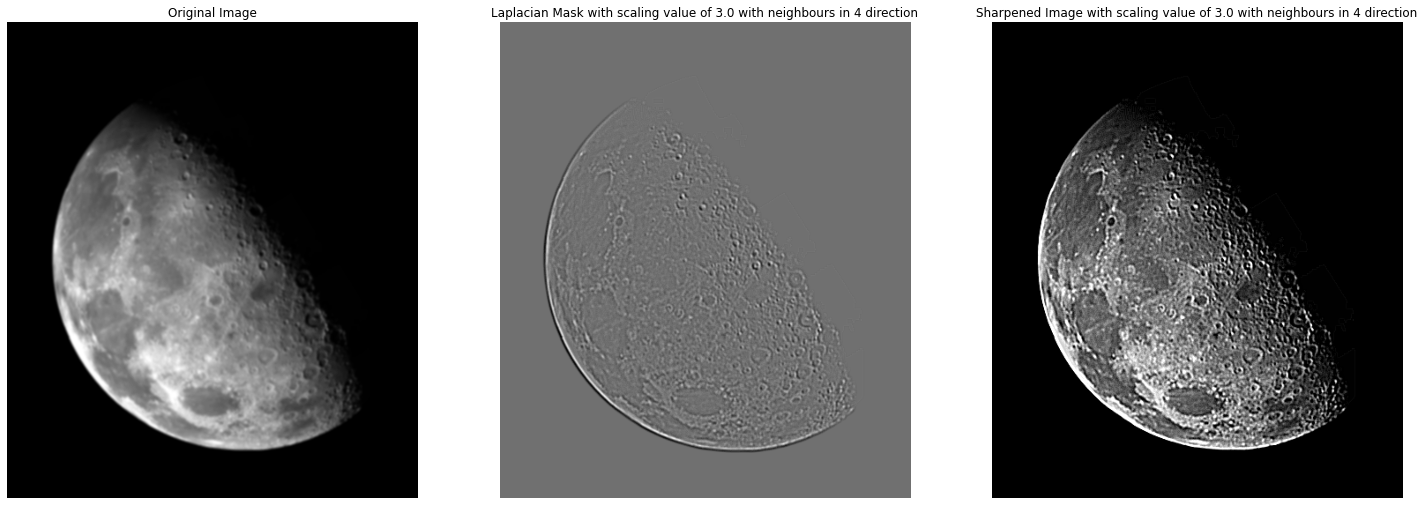

In [ ]:
fig = plt.figure(figsize = (25,50))
index = 1

image = Image.open('/content/DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif')
image = conv2d(image,generate_weighted_average_filter(3))
sharpened_scale,sharpened,masked_scale =final_laplacian_filter(image, -1, True, True, True,3.0)
img3 = sharpened_scale
print(np.array(image).shape)
print(np.array(sharpened_scale).shape)


fig.add_subplot(1,3,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(masked_scale, cmap ='gray')
plt.axis('off')
plt.title(f'Laplacian Mask with scaling value of {3.0} with neighbours in 4 direction')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(sharpened, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image with scaling value of {3.0} with neighbours in 4 direction')


#### Explanation
In the figure, we used an image of moon which was blured. We used a 4 directional laplacian filter with scaling value of $3.0$. As we can see the image seems much more sharp compared to the original image. This is because as we can see, the laplacian filter increases the sharpness of an image.

(540, 466)
(540, 466)


Text(0.5, 1.0, 'Sharpened Image with scaling value of 5.0 with neighbours in 4 direction')

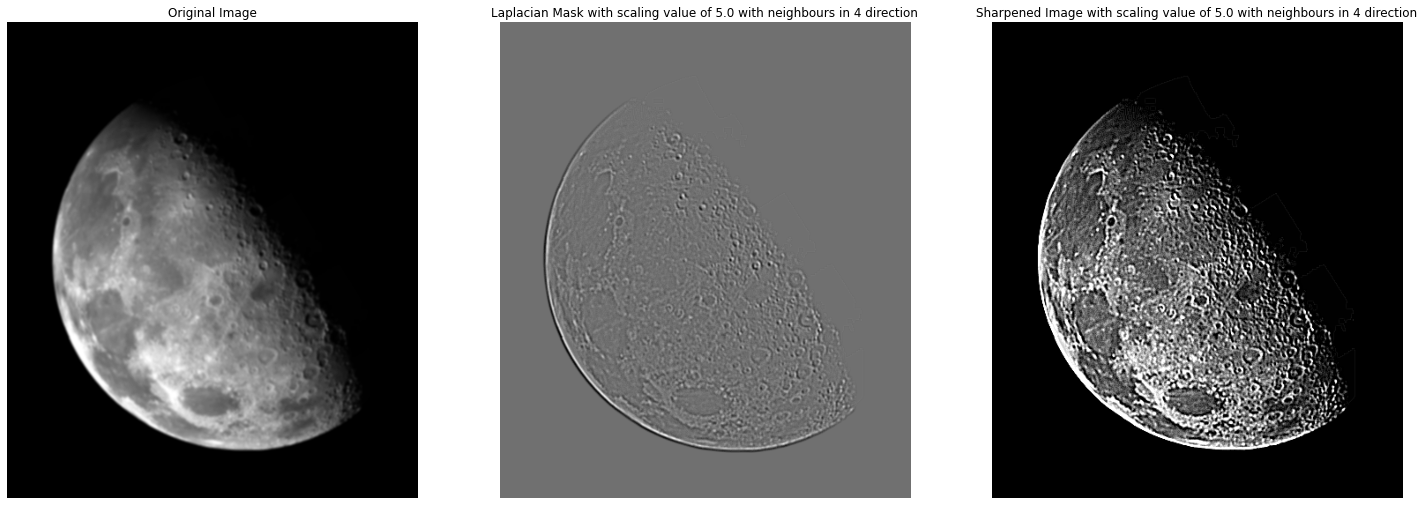

In [ ]:
fig = plt.figure(figsize = (25,50))
index = 1

image = Image.open('/content/DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif')
image = conv2d(image,generate_weighted_average_filter(3))
sharpened_scale,sharpened,masked_scale =final_laplacian_filter(image, -1, True, True, True,5.0)
img4 = sharpened_scale
print(np.array(image).shape)
print(np.array(sharpened_scale).shape)


fig.add_subplot(1,3,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(masked_scale, cmap ='gray')
plt.axis('off')
plt.title(f'Laplacian Mask with scaling value of {5.0} with neighbours in 4 direction')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(sharpened, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image with scaling value of {5.0} with neighbours in 4 direction')

#### Explanation
In the figure, we used an image of moon which was blured. We used a 4 directional laplacian filter with scaling value of $5.0$. As we can see the image seems much more sharp compared to the original image. This is because as we can see, the laplacian filter increases the sharpness of an image.

## Comparison with all five examples

Text(0.5, 1.0, 'Sharpened Image with scaling value of 5.0 with neighbours in 4 direction')

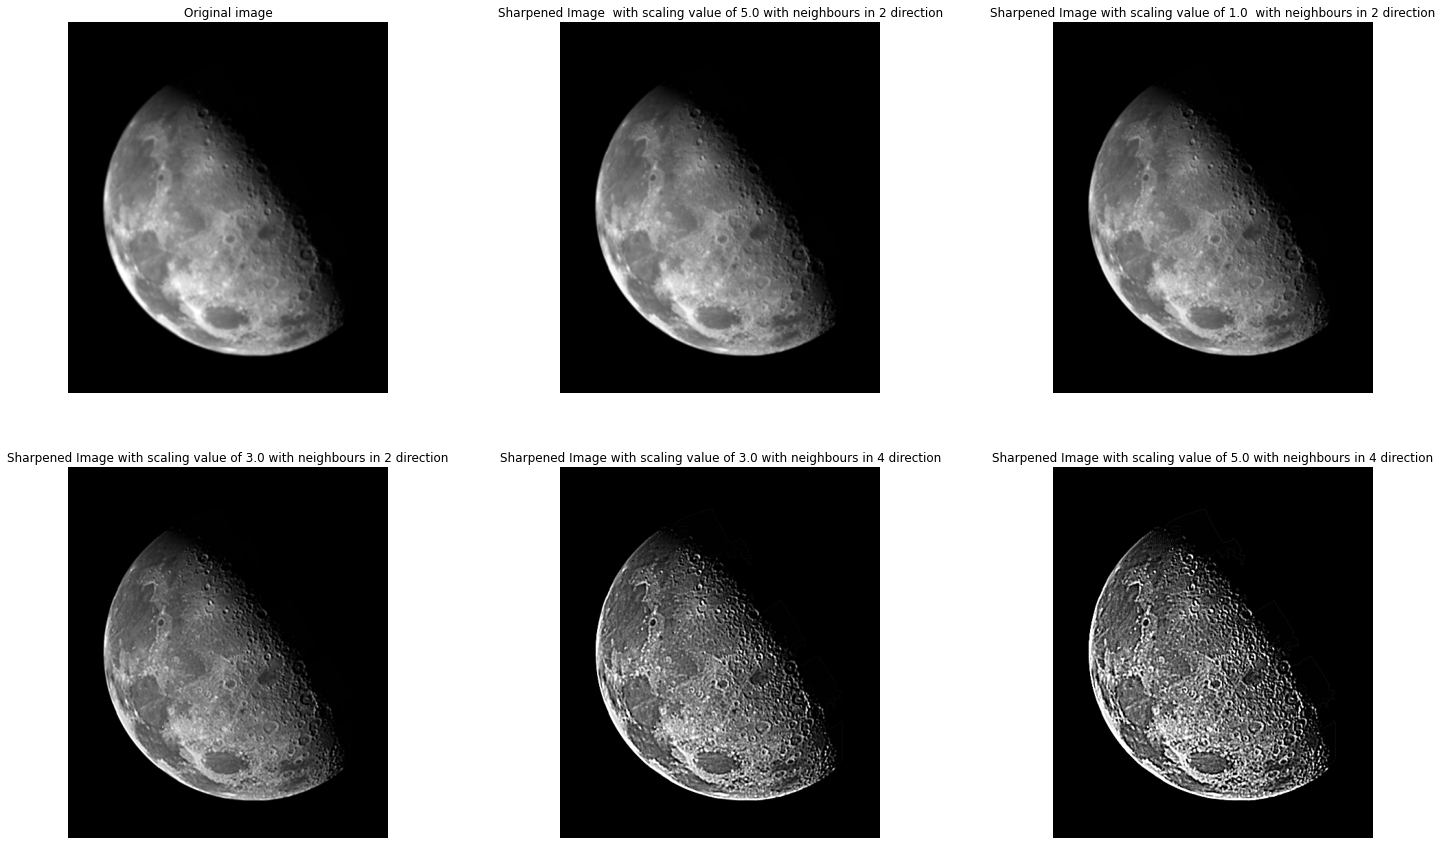

In [ ]:
fig = plt.figure(figsize = (25,15))
index = 1

fig.add_subplot(2,3,index)
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.title(f'Original image')

index += 1



fig.add_subplot(2,3,index)
plt.imshow(img0, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image  with scaling value of {5.0} with neighbours in 2 direction')

index += 1
fig.add_subplot(2,3,index)
plt.imshow(img1, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image with scaling value of {1.0}  with neighbours in 2 direction')

index += 1
fig.add_subplot(2,3,index)
plt.imshow(img2, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image with scaling value of {3.0} with neighbours in 2 direction')


index += 1
fig.add_subplot(2,3,index)
plt.imshow(img3, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image with scaling value of {3.0} with neighbours in 4 direction')

index += 1
fig.add_subplot(2,3,index)
plt.imshow(img4, cmap ='gray')
plt.axis('off')
plt.title(f'Sharpened Image with scaling value of {5.0} with neighbours in 4 direction')


In the figure we can see the comparison among all 5 examples that we illustrated. As we can see, the higher number of direction often provides us with a better sharp value. But, as we can see, if the scaling value is much more higher then the image looks much more noisy. 